In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")


In [12]:

df = pd.read_csv("Final-50-stocks.csv")

df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by='DATE')
df.set_index('DATE', inplace=True)

returns = df.pct_change().dropna()



In [4]:
stock_name = input("Enter Stock Name (e.g., TCS, RELIANCE): ").upper()

if stock_name not in df.columns:
    print(f"Stock '{stock_name}' not found in dataset.")
else:
    print(f"\n📊 Generating analysis for: {stock_name}\n")




📊 Generating analysis for: TCS



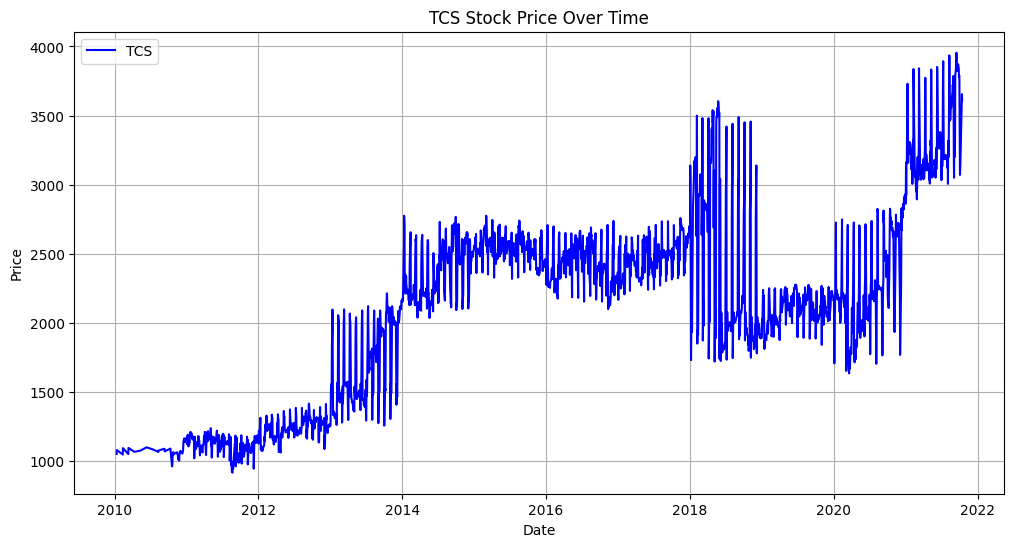

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[stock_name], label=stock_name, color='blue')
plt.title(f'{stock_name} Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()



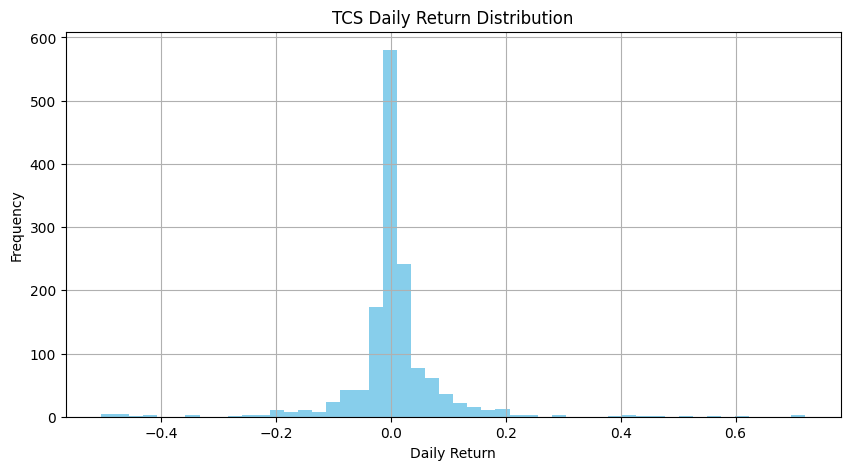

In [6]:
plt.figure(figsize=(10, 5))
returns[stock_name].hist(bins=50, color='skyblue')
plt.title(f'{stock_name} Daily Return Distribution')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [7]:
vol = returns[stock_name].std()
print(f"Volatility (Standard Deviation) of {stock_name}: {vol:.4f}")


Volatility (Standard Deviation) of TCS: 0.0869


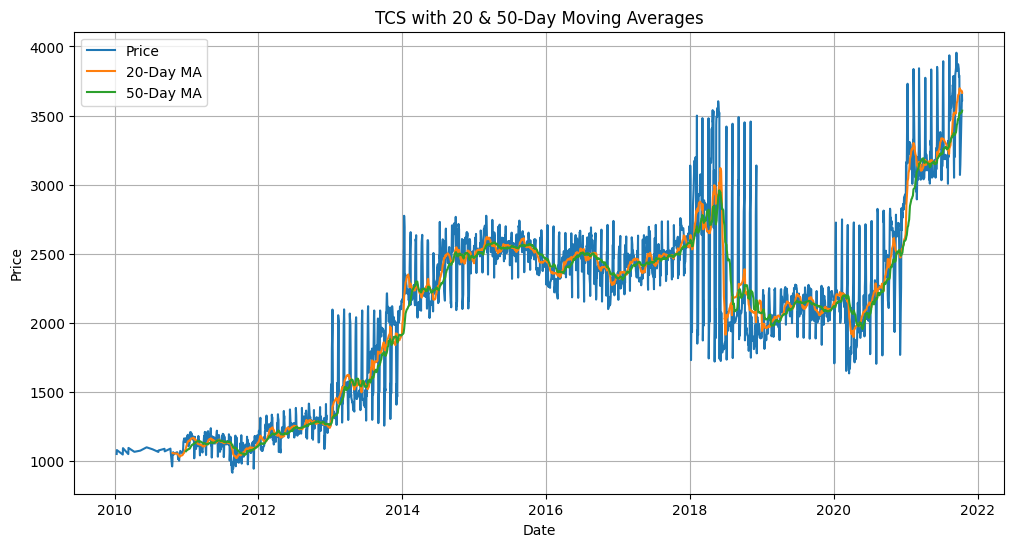

In [8]:
df[f'{stock_name}_MA20'] = df[stock_name].rolling(window=20).mean()
df[f'{stock_name}_MA50'] = df[stock_name].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df[stock_name], label='Price')
plt.plot(df.index, df[f'{stock_name}_MA20'], label='20-Day MA')
plt.plot(df.index, df[f'{stock_name}_MA50'], label='50-Day MA')
plt.title(f'{stock_name} with 20 & 50-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()



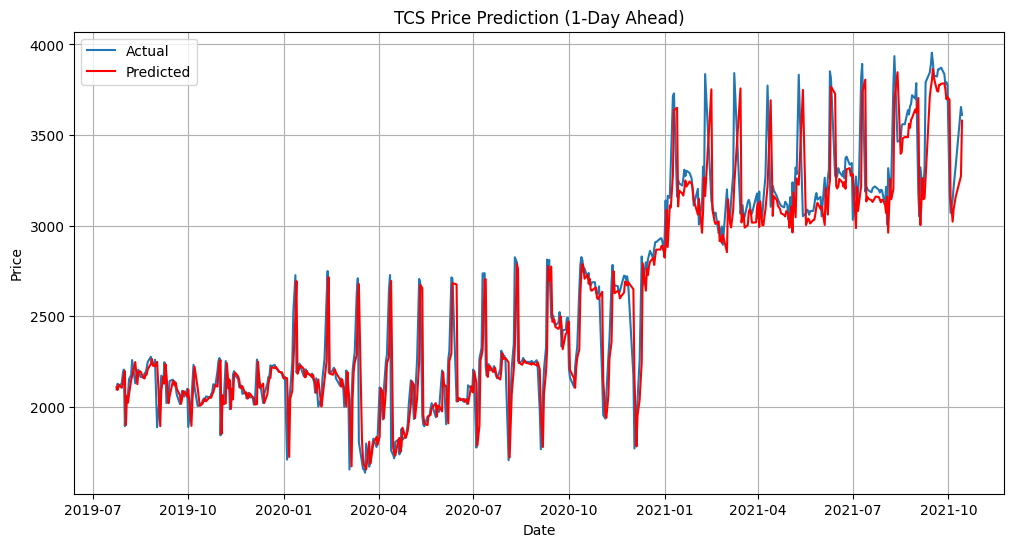

Mean Squared Error: 34954.92798389558
R² Score: 0.8969752684811713


In [9]:
stock_df = df[[stock_name]].copy()
stock_df['Shifted'] = stock_df[stock_name].shift(1)
stock_df = stock_df.dropna()

X = stock_df[['Shifted']]
y = stock_df[stock_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.title(f'{stock_name} Price Prediction (1-Day Ahead)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


In [10]:
last_known_price = df[stock_name].iloc[-1]
future_prices = []

for i in range(3):
    next_price = model.predict([[last_known_price]])[0]
    future_prices.append(next_price)
    last_known_price = next_price

print("\n📈 Predicted Prices for Next 3 Days:")
for i, price in enumerate(future_prices, start=1):
    print(f"Day {i}: ₹{price:.2f}")



📈 Predicted Prices for Next 3 Days:
Day 1: ₹3537.75
Day 2: ₹3467.48
Day 3: ₹3400.46
